In [15]:
import numpy as np
import scipy as sp
import matplotlib.pylab as plt
%matplotlib inline

In [8]:
# %load ../Tools/Histogram.py
import numpy as np


class Histogram():
    '''
    Class to storage histograms
    '''
    def __init__(self, data=[], nbin=None, minlim=None, maxlim=None,
                 name='default', isotope='default', volume='default',
                  material='default'):
        '''
        Creates an histogram from a given a list (empty by defoult),
        with low and high limits, by defoult are the minimum and
        maximum of de data sample and the bin number, by default
        the number of data squareroot
        '''

        if len(data) == 0:
            if minlim == 'nada' or maxlim == 'nada' or nbin == 'nada':
                auxs = 'In order to build an empty histogram it '
                auxs += 'is needed a minlim, maxlim and nbin'
                raise ValueError(auxs)
                return
            else:
                self.minlim = minlim
                self.maxlim = maxlim
                self.nbin = nbin

        else:
            if minlim is None:
                self.minlim = min(data)
            else:
                self.minlim = minlim
            if maxlim is None:
                self.maxlim = max(data)
            else:
                self.maxlim = maxlim
            if nbin is None:
                self.nbin = int(len(data)**0.5)
            else:
                self.nbin = nbin

        self.binsize = float(self.maxlim-self.minlim)/float(self.nbin)
        self.hist = np.array([])
        self.bins = np.array([])

        self.Build_hist(data)

        self.name = name
        self.isotope = isotope
        self.volume = volume
        self.material = material

    def __add__(self, hist):
        '''
        Suming histograms
        '''

        if not self.minlim == hist.minlim or not self.maxlim == hist.maxlim\
                or not self.nbin == hist.nbin:
            raise ValueError('Histograms are not compatible')
        else:
            auxhist = Histogram([], self.nbin, self.minlim, self.maxlim)
            auxhist.hist = self.hist + hist.hist
        return auxhist

    def Build_hist(self, data):
        '''
        Creating histogram using numpy ones but with bin centers instead
        '''
        auxhist, auxbins = np.histogram(np.array(data), self.nbin,
                                        [self.minlim, self.maxlim])
        auxbins = auxbins[:-1] + np.diff(auxbins)/2.
        self.hist = auxhist
        self.bins = auxbins

    def Fill_hist(self, data):
        '''
        Filling histogram
        '''
        data = np.array(data)
        self.hist += np.histogram(np.array(data), self.nbin, [self.minlim,
                                                              self.maxlim])[0]

    def Scale(self, factor):
        '''
        Explicit __rmul__, scales the histogram by a factor
        '''
        self.hist = factor*self.hist
        return self


In [9]:
auxlist = np.array([0,1,2,3,1,2,2,1,3,0,1,2,3]*100)
auxhist,auxbins = np.histogram(auxlist,3,[0,3])
%timeit auxhist,auxbins = np.histogram(auxlist,3,[0,3])
auxbincenter = [(auxbins[i]+auxbins[i+1])/2. for i in np.arange(len(auxbins)-1)]
print (auxhist,auxbins[:-1],auxbincenter)
%timeit Histogram(auxlist,3,0,3)
#print Build_hist(auxlist,3,0,3)

10000 loops, best of 3: 140 µs per loop
[200 400 700] [ 0.  1.  2.] [0.5, 1.5, 2.5]
10000 loops, best of 3: 171 µs per loop


In [10]:
a = Histogram(auxlist,3,0,3)
ap = Histogram(auxlist,3,1,3)
print (a.hist)

[200 400 700]


In [11]:
b = a+a.Scale(2.)
print (b.hist)

[  800.  1600.  2800.]


In [12]:
print(type(a),type(a.Scale(1)))

<class '__main__.Histogram'> <class '__main__.Histogram'>


In [21]:
import tables as tb
f = tb.open_file("../Data/data_spectrum.h5", "r")
minE,maxE,nbin = 0.0,3.,125


In [28]:
E = f.root.E[:]
Co = f.root.Co[:]
h_Co = Histogram([],nbin,minE,maxE)
h_Co.hist = Co
h_Co.bins = E

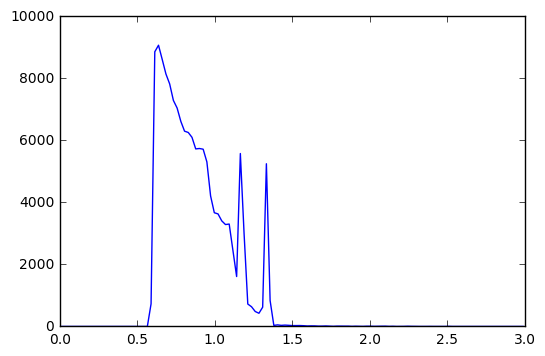

In [29]:
plt.plot(h_Co.bins,h_Co.hist)

In [30]:
h_Co.binsize

0.024

In [31]:
E[3]-E[2]

0.024000000000000007

In [32]:
h_Co.hist.sum()*h_Co.binsize

3575.424

In [33]:
h_Co.hist.sum()

148976.0